<a href="https://colab.research.google.com/github/Bharatgaur/Trading/blob/main/TRADE_PROBABILITIES_BASE_FILE_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [39]:
# importing dependent libraries
import pandas as pd
import random
import matplotlib.pyplot as plt

In [41]:
# Constants defined
BASE_CAPITAL = 25000
PERCENTAGE = 0.40  # 30% of capital
LOT_SIZE = 15  # 15 units per trade
TARGET_PCT = 40
STOPLOSS_PCT = 60
RISK = 20
REWARD = RISK*2.5

In [42]:
# Calculate Transaction Charges
brokerage = 0.01
transaction_charges_pct = 0.03503
stt_pct = 0.1
ipft_pct = 0.0005
stamp_duty_pct = 0.003
sebi_charges_pct = 0.0001
gst_pct = 0.18

In [43]:
# Trade Entry DataFrame
trade_entry_df = pd.read_csv("https://raw.githubusercontent.com/Bharatgaur/Trading/main/trade_entry_1001_columns.csv")
print("Data from trade_entry_1001_columns:")
print(trade_entry_df.head(), "\n")

Data from trade_entry_1001_columns:
     TRADE NO  COLUMN_1  COLUMN_2  COLUMN_3  COLUMN_4  COLUMN_5  COLUMN_6  \
0  TRADE 0001       423       449       444       371       365       425   
1  TRADE 0002       351       399       416       436       371       324   
2  TRADE 0003       398       425       436       326       439       316   
3  TRADE 0004       400       308       378       412       300       334   
4  TRADE 0005       432       306       398       414       352       358   

   COLUMN_7  COLUMN_8  COLUMN_9  ...  COLUMN_991  COLUMN_992  COLUMN_993  \
0       354       376       375  ...         408         403         426   
1       300       394       343  ...         389         339         338   
2       368       323       414  ...         450         410         325   
3       364       429       376  ...         392         315         379   
4       380       314       368  ...         431         412         404   

   COLUMN_994  COLUMN_995  COLUMN_996  COLUM

In [44]:
# Trade Target/Stoploss DataFrame
trade_target_stoploss_df = pd.read_csv("https://raw.githubusercontent.com/Bharatgaur/Trading/main/trade_target_stoploss_1001_columns.csv")
print("Data from trade_target_stoploss_1001_columns:")
print(trade_target_stoploss_df.head(), "\n")

Data from trade_target_stoploss_1001_columns:
     TRADE NO  COLUMN_1  COLUMN_2 COLUMN_3  COLUMN_4  COLUMN_5  COLUMN_6  \
0  TRADE 0001  STOPLOSS  STOPLOSS   TARGET    TARGET  STOPLOSS  STOPLOSS   
1  TRADE 0002  STOPLOSS    TARGET   TARGET    TARGET  STOPLOSS  STOPLOSS   
2  TRADE 0003  STOPLOSS  STOPLOSS   TARGET    TARGET  STOPLOSS    TARGET   
3  TRADE 0004  STOPLOSS    TARGET   TARGET    TARGET  STOPLOSS    TARGET   
4  TRADE 0005    TARGET    TARGET   TARGET  STOPLOSS    TARGET    TARGET   

   COLUMN_7  COLUMN_8  COLUMN_9  ... COLUMN_991 COLUMN_992 COLUMN_993  \
0  STOPLOSS  STOPLOSS    TARGET  ...     TARGET   STOPLOSS     TARGET   
1    TARGET  STOPLOSS    TARGET  ...     TARGET     TARGET     TARGET   
2    TARGET    TARGET    TARGET  ...   STOPLOSS   STOPLOSS   STOPLOSS   
3  STOPLOSS  STOPLOSS  STOPLOSS  ...     TARGET     TARGET     TARGET   
4    TARGET    TARGET  STOPLOSS  ...   STOPLOSS     TARGET     TARGET   

  COLUMN_994 COLUMN_995 COLUMN_996 COLUMN_997 COLUMN_998 C

In [45]:
# Trade PnL DataFrame
trade_pnl_df = pd.read_csv("https://raw.githubusercontent.com/Bharatgaur/Trading/main/trade_pnl_1001_columns.csv")
print("Data from trade_pnl_1001_columns:")
print(trade_pnl_df.head(), "\n")

Data from trade_pnl_1001_columns:
     TRADE NO  COLUMN_1  COLUMN_2  COLUMN_3  COLUMN_4  COLUMN_5  COLUMN_6  \
0  TRADE 0001   24700.0   24700.0   25750.0   25750.0   24700.0   24700.0   
1  TRADE 0002   24400.0   25450.0   26500.0   26500.0   24400.0   24400.0   
2  TRADE 0003   24100.0   25150.0   27250.0   27250.0   24100.0   25150.0   
3  TRADE 0004   23800.0   25900.0   28000.0   28000.0   23800.0   25900.0   
4  TRADE 0005   24550.0   26650.0   28750.0   27700.0   24550.0   26650.0   

   COLUMN_7  COLUMN_8  COLUMN_9  ...  COLUMN_991  COLUMN_992  COLUMN_993  \
0   24700.0   24700.0   25750.0  ...     25750.0     24700.0     25750.0   
1   25450.0   24400.0   26500.0  ...     26500.0     25450.0     26500.0   
2   26200.0   25150.0   27250.0  ...     26200.0     25150.0     26200.0   
3   25900.0   24850.0   26950.0  ...     26950.0     25900.0     26950.0   
4   26650.0   25600.0   26650.0  ...     26650.0     26650.0     27700.0   

   COLUMN_994  COLUMN_995  COLUMN_996  COLUMN_

In [46]:
# Final PnL QTY DataFrame
final_pnl_qty_df = pd.read_csv("https://raw.githubusercontent.com/Bharatgaur/Trading/main/final_PnL_QTY.csv")
print("Data from final_PnL_QTY:")
print(final_pnl_qty_df.head(), "\n")

Data from final_PnL_QTY:
     TRADE NO  COLUMN_1_QTY  COLUMN_1_CUM_PNL  COLUMN_2_QTY  COLUMN_2_CUM_PNL  \
0  TRADE 0001             1           24700.0             1           24700.0   
1  TRADE 0002             1           24400.0             1           25450.0   
2  TRADE 0003             1           24100.0             1           25150.0   
3  TRADE 0004             1           23800.0             1           25900.0   
4  TRADE 0005             1           24550.0             1           26650.0   

   COLUMN_3_QTY  COLUMN_3_CUM_PNL  COLUMN_4_QTY  COLUMN_4_CUM_PNL  \
0             1           25750.0             1           25750.0   
1             1           26500.0             1           26500.0   
2             1           27250.0             1           27250.0   
3             1           28000.0             1           28000.0   
4             1           28750.0             1           27700.0   

   COLUMN_5_QTY  ...  COLUMN_996_QTY  COLUMN_996_CUM_PNL  COLUMN_997_QTY 

In [47]:
# Final PnL QTY C DataFrame
final_pnl_qty_c_df = pd.read_csv("https://raw.githubusercontent.com/Bharatgaur/Trading/main/final_PnL_QTY_C.csv")
print("Data from final_PnL_QTY_C:")
print(final_pnl_qty_c_df.head(), "\n")

Data from final_PnL_QTY_C:
     TRADE NO  COLUMN_1_QTY  COLUMN_1_CUM_PNL  COLUMN_2_QTY  COLUMN_2_CUM_PNL  \
0  TRADE 0001             1          24687.21             1          24686.39   
1  TRADE 0002             1          24376.67             1          25422.63   
2  TRADE 0003             1          24064.67             1          25109.78   
3  TRADE 0004             1          23752.59             1          25848.88   
4  TRADE 0005             1          24487.80             1          26588.04   

   COLUMN_3_QTY  COLUMN_3_CUM_PNL  COLUMN_4_QTY  COLUMN_4_CUM_PNL  \
0             1          25734.83             1          25737.12   
1             1          26470.54             1          26472.20   
2             1          27205.62             1          27210.74   
3             1          27942.52             1          27946.57   
4             1          28678.80             1          27634.06   

   COLUMN_5_QTY  ...  COLUMN_996_QTY  COLUMN_996_CUM_PNL  COLUMN_997_QT

**Base Capital**

**Part of capital use into trade**

**Target pionts**

**Stoploss points**

**Random Target and Stoploss ratio is 40 % target and 60 % stoploss**


***Charges applicable on buy and sell in options ***

# **ENTRY PRICE**

In [48]:
trade_entry_df.head()

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,423,449,444,371,365,425,354,376,375,...,408,403,426,328,360,370,417,392,317,365
1,TRADE 0002,351,399,416,436,371,324,300,394,343,...,389,339,338,301,318,361,348,328,410,330
2,TRADE 0003,398,425,436,326,439,316,368,323,414,...,450,410,325,313,403,386,322,405,345,384
3,TRADE 0004,400,308,378,412,300,334,364,429,376,...,392,315,379,341,365,443,338,430,358,303
4,TRADE 0005,432,306,398,414,352,358,380,314,368,...,431,412,404,375,380,420,352,406,395,422


# **RANDOM TARGET AND STOPLOSS**

**40 % TARGET 60 % STOPLOSS**

**RISK:REWARD 1:2.5**

In [49]:
trade_target_stoploss_df.head()

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,...,TARGET,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS
1,TRADE 0002,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,...,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET
2,TRADE 0003,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,TARGET,TARGET,TARGET,...,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS
3,TRADE 0004,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,...,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS
4,TRADE 0005,TARGET,TARGET,TARGET,STOPLOSS,TARGET,TARGET,TARGET,TARGET,STOPLOSS,...,STOPLOSS,TARGET,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET


Max and min count percentage of "Target" and average count of "Target"



In [50]:
# Load the CSV file
df_t = trade_target_stoploss_df

# Exclude "TRADE NO" from the calculations
df_t_excluded = df_t.drop(columns=["TRADE NO"])

# 1. Calculate max value of count "TARGET" and its column name
max_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmax()  # Get column name
max_target_value = (df_t_excluded[max_target_column] == "TARGET").sum()  # Get max value
max_target_percentage = (max_target_value / len(df_t) * 100)  # Convert to percentage
print(f"Max Count of 'TARGET': {max_target_percentage:.1f} % in Column: {max_target_column}")

# 2. Calculate min value of count "TARGET" and its column name
min_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmin()  # Get column name
min_target_value = (df_t_excluded[min_target_column] == "TARGET").sum()  # Get min value
min_target_percentage = (min_target_value / len(df_t) * 100)  # Convert to percentage
print(f"Min Count of 'TARGET': {min_target_percentage:.1f} % in Column: {min_target_column}")

# 3. Calculate average value of count "TARGET" from all columns
target_counts = df_t_excluded.apply(lambda col: (col == "TARGET").sum())  # Count "TARGET" in each column
average_target_value = target_counts.mean()  # Calculate average
average_target_percentage = (average_target_value / len(df_t) * 100)  # Convert to percentage
print(f"Average Count of 'TARGET': {average_target_percentage:.2f} %")


Max Count of 'TARGET': 44.7 % in Column: COLUMN_324
Min Count of 'TARGET': 34.5 % in Column: COLUMN_751
Average Count of 'TARGET': 39.96 %


IF you want to test random column you can enter the name of columns here

In [51]:
column_name = 'COLUMN_199' # select column_name from COLUMN_1 to COLUMN_1000 COLUMN_888_CUM_PNL
# Count the frequency of "TARGET" and "STOPLOSS" in COLUMN_1
frequency = df_t[column_name].value_counts()/10

# Print the results
print(frequency)

COLUMN_199
STOPLOSS    57.2
TARGET      42.8
Name: count, dtype: float64


# **PnL**

PnL without charges and only one lot

In [52]:
trade_pnl_df.head()

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,24700.0,24700.0,25750.0,25750.0,24700.0,24700.0,24700.0,24700.0,25750.0,...,25750.0,24700.0,25750.0,25750.0,25750.0,24700.0,24700.0,24700.0,25750.0,24700.0
1,TRADE 0002,24400.0,25450.0,26500.0,26500.0,24400.0,24400.0,25450.0,24400.0,26500.0,...,26500.0,25450.0,26500.0,25450.0,26500.0,24400.0,24400.0,25450.0,25450.0,25450.0
2,TRADE 0003,24100.0,25150.0,27250.0,27250.0,24100.0,25150.0,26200.0,25150.0,27250.0,...,26200.0,25150.0,26200.0,25150.0,26200.0,24100.0,24100.0,26200.0,26200.0,25150.0
3,TRADE 0004,23800.0,25900.0,28000.0,28000.0,23800.0,25900.0,25900.0,24850.0,26950.0,...,26950.0,25900.0,26950.0,24850.0,26950.0,23800.0,24850.0,25900.0,25900.0,24850.0
4,TRADE 0005,24550.0,26650.0,28750.0,27700.0,24550.0,26650.0,26650.0,25600.0,26650.0,...,26650.0,26650.0,27700.0,25600.0,27700.0,23500.0,24550.0,25600.0,26650.0,25600.0


In [74]:
df_no_charges = trade_pnl_df

# Get the last row as a DataFrame
last_row_df = df_no_charges.iloc[[-1]]

# Filter only numeric values
numeric_values = last_row_df.select_dtypes(include=['number'])

# Find the max and min values along with their corresponding column names
max_value = numeric_values.max(axis=1).values[0]  # Max value
max_column = numeric_values.idxmax(axis=1).values[0]  # Column name of max value

min_value = numeric_values.min(axis=1).values[0]  # Min value
min_column = numeric_values.idxmin(axis=1).values[0]  # Column name of min value

# Output the results
print(f"Max Capital: {max_value} in Column: {max_column}")
Max_Capital_growth_pct = max_value*100/BASE_CAPITAL
print(f"Max Capital growth with 1 lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_value} in Column: {min_column}")
Min_Capital_growth_pct = min_value*100/BASE_CAPITAL
print(f"Min Capital growth with 1 lot: {Min_Capital_growth_pct:.2f} %")


Max Capital: 194350.0 in Column: COLUMN_324
Max Capital growth with 1 lot: 777.40 %
Min Capital: 87250.0 in Column: COLUMN_751
Min Capital growth with 1 lot: 349.00 %


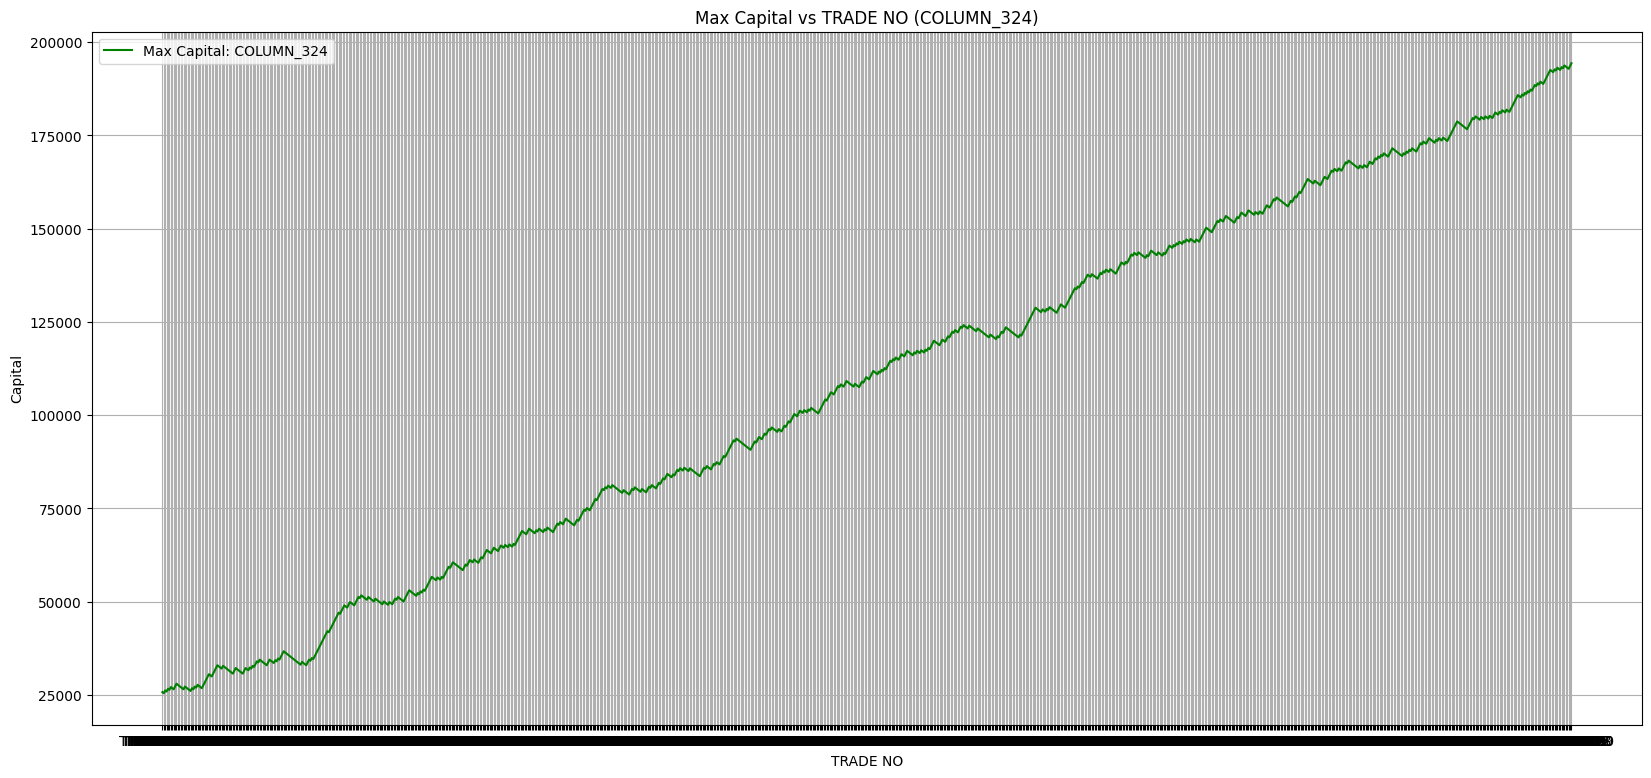

In [70]:
# Identify the max value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
max_column = numeric_values.idxmax(axis=1).values[0]

# Plot max capital vs TRADE NO
fig, ax = plt.subplots(figsize=(20, 9))

# Set background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Plot with green line
ax.plot(df_no_charges['TRADE NO'],
        df_no_charges[max_column],
        label=f'Max Capital: {max_column}',
        color='green')

# Labels, title, legend, and grid
ax.set_xlabel('TRADE NO')
ax.set_ylabel('Capital')
ax.set_title(f'Max Capital vs TRADE NO ({max_column})')
ax.legend()
ax.grid(True)

# Show plot
plt.show()


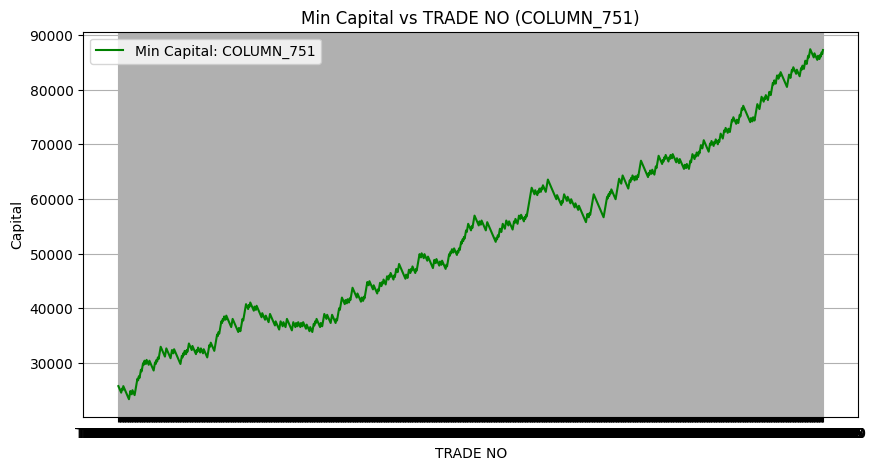

In [55]:
# Identify the min value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
min_column = numeric_values.idxmin(axis=1).values[0]

# Plot min capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_no_charges['TRADE NO'], df_no_charges[min_column], label=f'Min Capital: {min_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_column})')
plt.legend()
plt.grid(True)
plt.show()


# **QUANTITY CALCULATION**

PnL without charges and lot qty based on capital wise

In [56]:
final_pnl_qty_df.head()

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,1,24700.0,1,24700.0,1,25750.0,1,25750.0,1,...,1,24700.0,1,24700.0,1,24700.0,1,25750.0,1,24700.0
1,TRADE 0002,1,24400.0,1,25450.0,1,26500.0,1,26500.0,1,...,1,24400.0,1,24400.0,1,25450.0,1,25450.0,1,25450.0
2,TRADE 0003,1,24100.0,1,25150.0,1,27250.0,1,27250.0,1,...,1,24100.0,1,24100.0,1,26200.0,1,26200.0,1,25150.0
3,TRADE 0004,1,23800.0,1,25900.0,1,28000.0,1,28000.0,1,...,1,23800.0,1,24850.0,1,25900.0,1,25900.0,1,24850.0
4,TRADE 0005,1,24550.0,1,26650.0,1,28750.0,1,27700.0,1,...,1,23500.0,1,24550.0,1,25600.0,1,26650.0,1,25600.0


In [76]:
# Load the data from the CSV file
df_QTY = final_pnl_qty_df

# Get the last row
last_row = df_QTY.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Print the results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")

# Output the results
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
Max_Capital_growth_pct = max_capital*100/BASE_CAPITAL
print(f"Max Capital growth with 1 lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")
Min_Capital_growth_pct = min_capital*100/BASE_CAPITAL
print(f"Min Capital growth with 1 lot: {Min_Capital_growth_pct:.2f} %")





Max QTY: 4719 in Column: COLUMN_324_QTY
Max Capital: 91899100 in Column: COLUMN_800_CUM_PNL
Max Capital growth with 1 lot: 367596.40 %
Min Capital: 303850 in Column: COLUMN_751_CUM_PNL
Min Capital growth with 1 lot: 1215.40 %


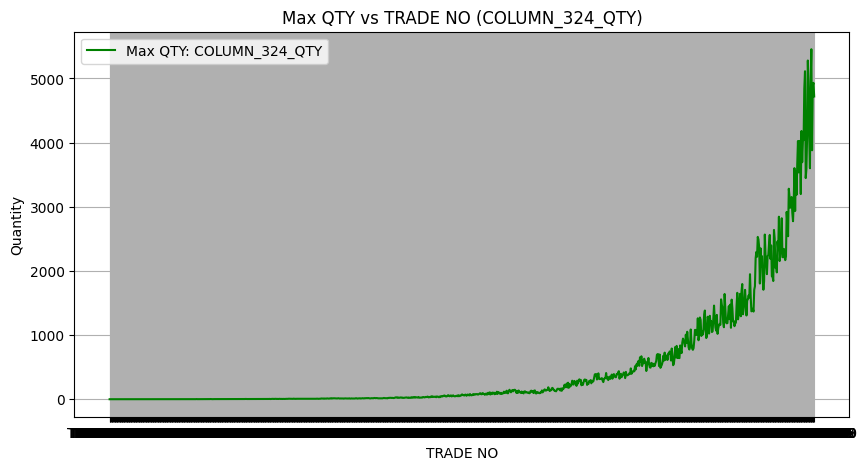

In [58]:
# Identify the column with max QTY
last_row = df_QTY.iloc[-1]
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_qty_column], label=f'Max QTY: {max_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(True)
plt.show()


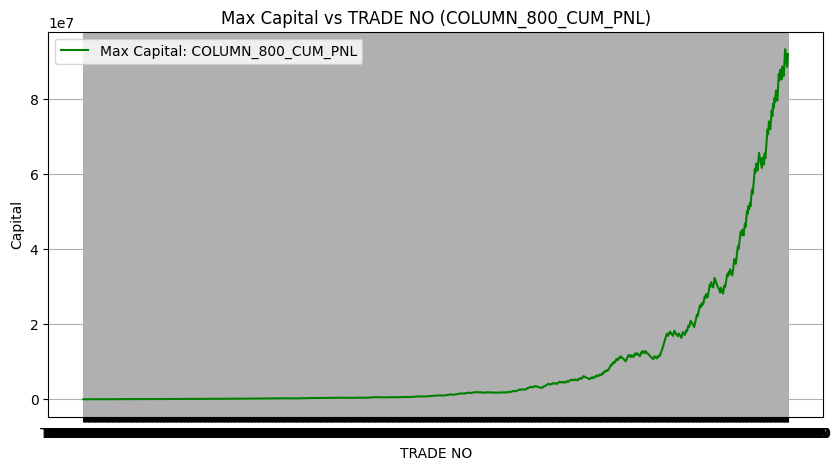

In [59]:
# Identify the column with max capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(True)
plt.show()

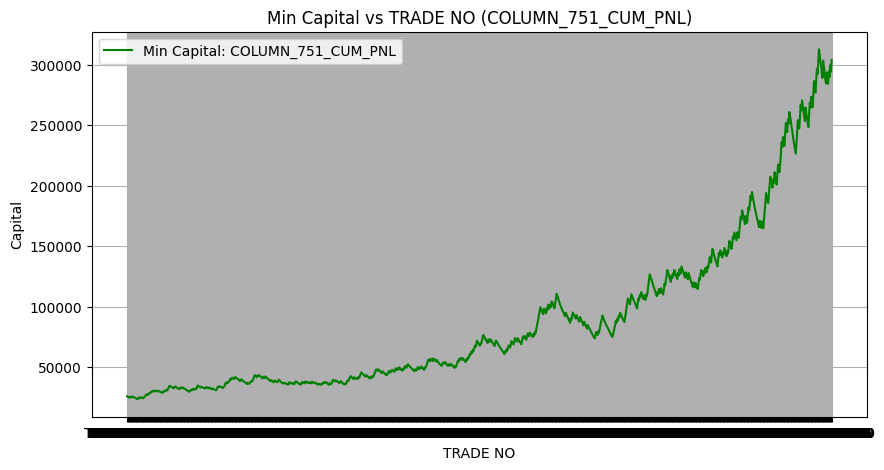

In [60]:
# Identify the column with min capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[min_capital_column], label=f'Min Capital: {min_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(True)
plt.show()

PnL including charges and lot qty based on capital wise

In [61]:
final_pnl_qty_c_df.head()

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,1,24687.21,1,24686.39,1,25734.83,1,25737.12,1,...,1,24688.87,1,24687.40,1,24688.18,1,25738.82,1,24689.03
1,TRADE 0002,1,24376.67,1,25422.63,1,26470.54,1,26472.20,1,...,1,24378.02,1,24376.96,1,25426.65,1,25426.43,1,25427.43
2,TRADE 0003,1,24064.67,1,25109.78,1,27205.62,1,27210.74,1,...,1,24066.39,1,24067.33,1,26162.70,1,26164.37,1,25115.87
3,TRADE 0004,1,23752.59,1,25848.88,1,27942.52,1,27946.57,1,...,1,23752.97,1,24805.49,1,25849.69,1,25853.61,1,24806.84
4,TRADE 0005,1,24487.80,1,26588.04,1,28678.80,1,27634.06,1,...,1,23440.27,1,24494.92,1,25537.43,1,26589.98,1,25542.36


In [78]:
# Load the data from the CSV file
df_QTY_C = final_pnl_qty_c_df

# Get the last row
last_row = df_QTY_C.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Print the results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")

# Output the results
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
Max_Capital_growth_pct = max_capital*100/BASE_CAPITAL
print(f"Max Capital growth with variable lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")
Min_Capital_growth_pct = min_capital*100/BASE_CAPITAL
print(f"Min Capital growth with variable lot: {Min_Capital_growth_pct:.2f} %")

Max QTY: 2606 in Column: COLUMN_324_QTY
Max Capital: 49692498 in Column: COLUMN_800_CUM_PNL
Max Capital growth with variable lot: 198769.99 %
Min Capital: 169370 in Column: COLUMN_751_CUM_PNL
Min Capital growth with variable lot: 677.48 %


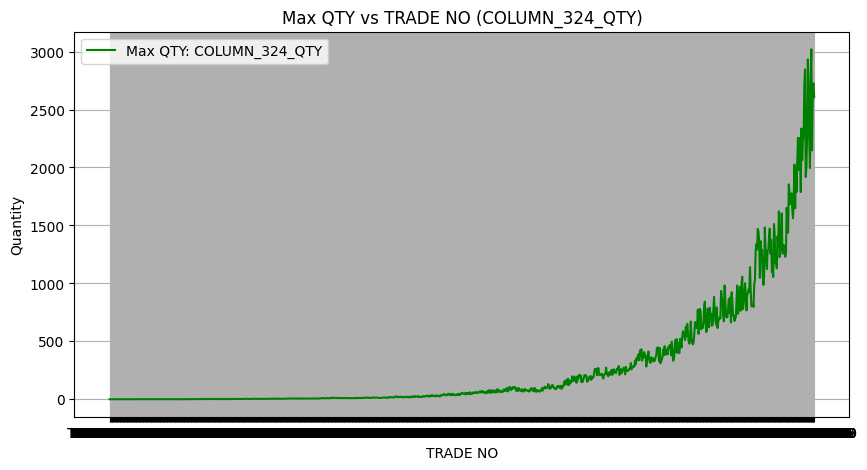

In [63]:
# Identify the column with max QTY from the last row
last_row = df_QTY_C.iloc[-1]
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_qty_column], label=f'Max QTY: {max_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(True)
plt.show()


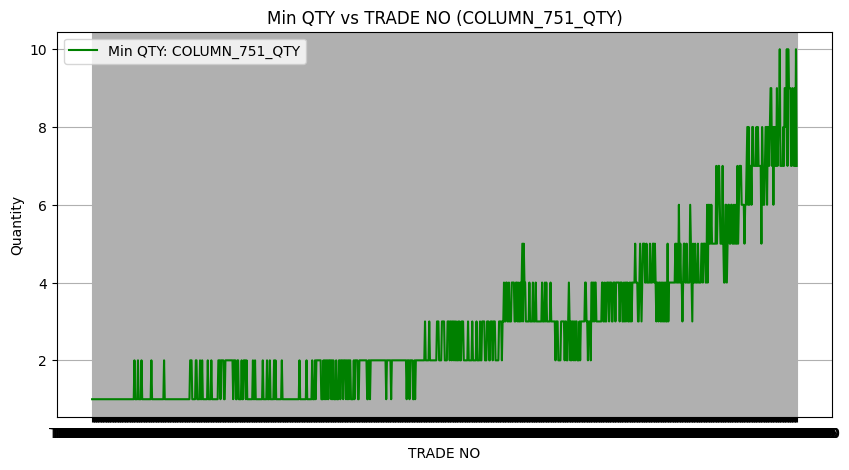

In [64]:
# Identify the column with min QTY from the last row
min_qty_column = last_row[qty_columns].idxmin()

# Plot Min QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_qty_column], label=f'Min QTY: {min_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Min QTY vs TRADE NO ({min_qty_column})')
plt.legend()
plt.grid(True)
plt.show()

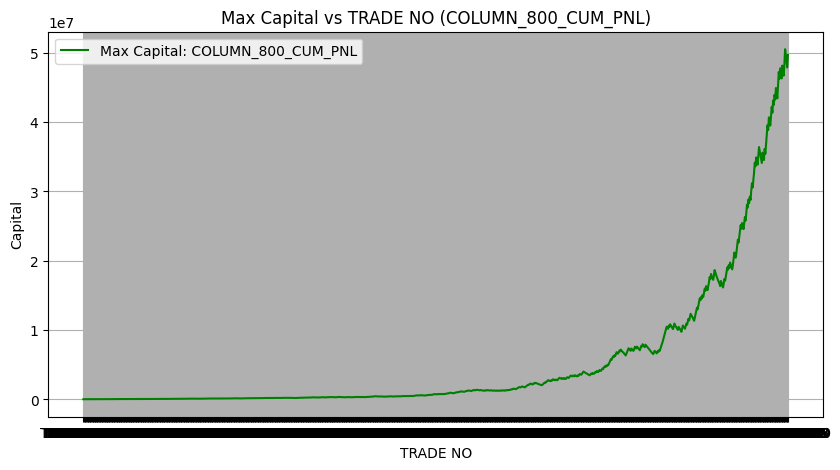

In [65]:
# Identify the column with max capital from the last row
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(True)
plt.show()


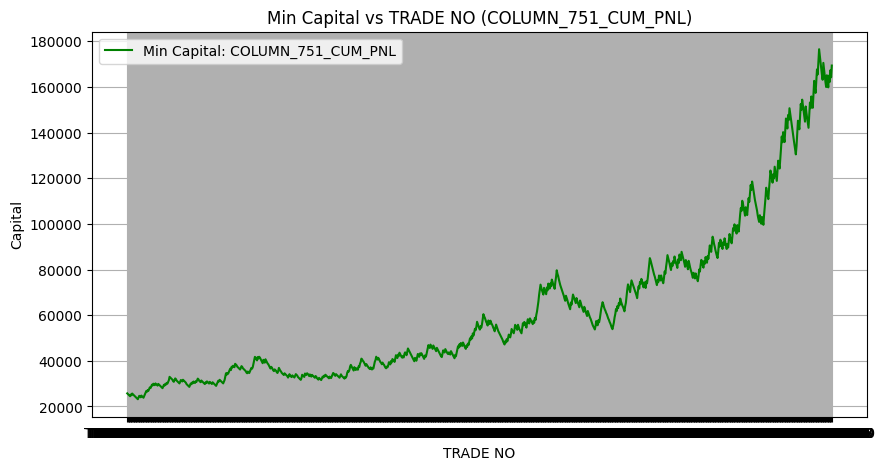

In [66]:
# Identify the column with min capital from the last row
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_capital_column], label=f'Min Capital: {min_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(True)
plt.show()


# **NEED TO BE EDIT**

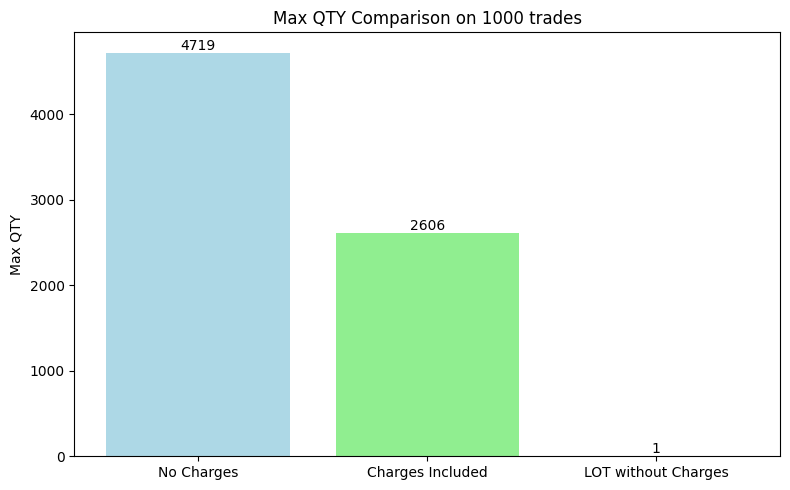

In [ ]:
def get_summary_QTY(file_name):
    # Load the data from the CSV file
    df_Max_QTY = pd.read_csv(file_name)

    # Get the last row
    last_row = df_Max_QTY.iloc[-1]

    # Extract QTY values and find max along with their corresponding column names
    qty_columns = [col for col in df_Max_QTY.columns if col.endswith('_QTY')]

    # If there are no quantity columns, assume max qty as 1
    if qty_columns:
        max_qty = last_row[qty_columns].max()
    else:
        max_qty = 1  # Assume max qty as 1 if no qty columns are present

    return max_qty

# Get Max QTY for both files
max_qty_no_charges = get_summary_QTY('final_PnL_QTY.csv')        # No charges included
max_qty_charges = get_summary_QTY('final_PnL_QTY_C.csv')        # Charges included

# Load the trade data for additional output
# Assume max quantity for the trade CSV file is 1
max_qty_additional = 1

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'LOT without Charges']
max_qty_values = [max_qty_no_charges, max_qty_charges, max_qty_additional]

# Create bar chart for Max QTY
plt.figure(figsize=(8, 5))
plt.bar(labels, max_qty_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max QTY')
plt.title('Max QTY Comparison on 1000 trades')
for i, v in enumerate(max_qty_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')  # Annotate bars with their values
plt.tight_layout()
plt.show()

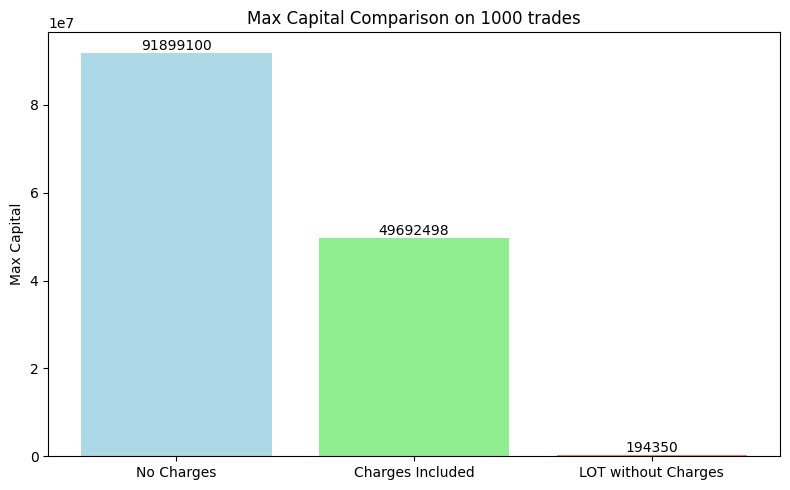

In [ ]:
def get_summary_capital(file_name):
    # Load the data from the CSV file
    df_Max_Capital = pd.read_csv(file_name)

    # Get the last row
    last_row = df_Max_Capital.iloc[-1]

    # Extract CUM_PNL values and find max along with their corresponding column names
    capital_columns = [col for col in df_Max_Capital.columns if col.endswith('_CUM_PNL')]
    max_capital = last_row[capital_columns].max()

    return max_capital

# Get Max Capital for both files
max_capital_no_charges = get_summary_capital('final_PnL_QTY.csv')        # No charges included
max_capital_charges = get_summary_capital('final_PnL_QTY_C.csv')        # Charges included

# Load the trade data for additional output
df_no_charges = pd.read_csv('trade_pnl_1001_columns.csv')
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
max_capital_additional = numeric_values.max(axis=1).values[0]  # Get the max value from the Series

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'LOT without Charges']
max_capital_values = [max_capital_no_charges, max_capital_charges, max_capital_additional]

# Create bar chart for Max Capital
plt.figure(figsize=(8, 5))
plt.bar(labels, max_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max Capital')
plt.title('Max Capital Comparison on 1000 trades')
for i, v in enumerate(max_capital_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')  # Annotate bars with their values
plt.tight_layout()
plt.show()

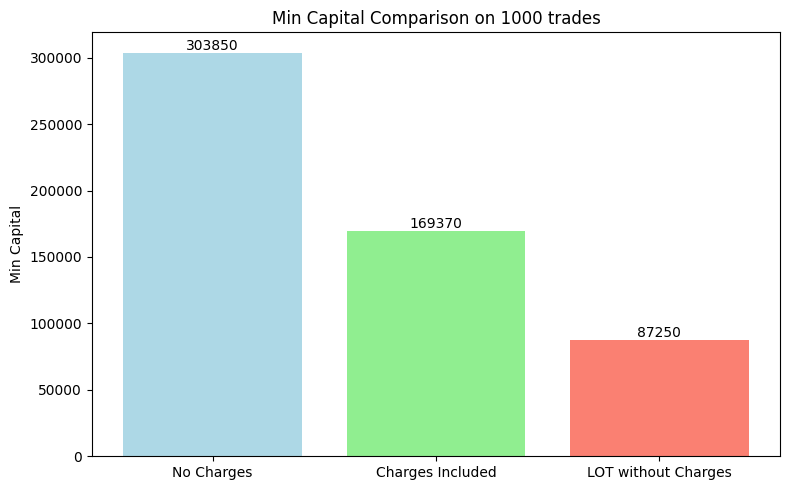

In [ ]:
def get_summary_min_capital(file_name):
    # Load the data from the CSV file
    df_Min_Capital = pd.read_csv(file_name)

    # Get the last row
    last_row = df_Min_Capital.iloc[-1]

    # Extract CUM_PNL values and find min along with their corresponding column names
    capital_columns = [col for col in df_Min_Capital.columns if col.endswith('_CUM_PNL')]
    min_capital = last_row[capital_columns].min()

    return min_capital

# Get Min Capital for both files
min_capital_no_charges = get_summary_min_capital('final_PnL_QTY.csv')        # No charges included
min_capital_charges = get_summary_min_capital('final_PnL_QTY_C.csv')        # Charges included

# Load the trade data for additional output
df_no_charges = pd.read_csv('trade_pnl_1001_columns.csv')
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
min_capital_additional = numeric_values.min(axis=1).values[0]  # Get the min value from the Series

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'LOT without Charges']
min_capital_values = [min_capital_no_charges, min_capital_charges, min_capital_additional]

# Create bar chart for Min Capital
plt.figure(figsize=(8, 5))
plt.bar(labels, min_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Min Capital')
plt.title('Min Capital Comparison on 1000 trades')
for i, v in enumerate(min_capital_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')  # Annotate bars with their values
plt.tight_layout()
plt.show()